In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [4]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [5]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [6]:
train['Past_Results'].value_counts()

1     272
0     250
2      13
3       5
10      1
6       1
4       1
Name: Past_Results, dtype: int64

In [7]:
X = train.drop(['IsUnderRisk'], axis=1)
y = train['IsUnderRisk']

In [8]:
X.drop(columns=["Past_Results","Loss_score","City"],inplace=True)
test.drop(columns=["Past_Results","Loss_score","City"],inplace=True)

In [9]:
X.head()

,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score
0,8.032,14,8,3
1,77.730,8,3,3
2,59.203,3,12,11
3,73.080,4,5,7
4,15.666,13,15,6


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: IsUnderRisk, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

In [14]:
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
print(model.score(X_test, y_test))
print(log_loss(y_test, model.predict(X_test)))
print(f1_score(y_test, model.predict(X_test)))

0.8623853211009175
4.753064630421568
0.8936170212765958


In [16]:
importance = model.feature_importances_

In [17]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.27754
Feature: 1, Score: 0.37634
Feature: 2, Score: 0.20371
Feature: 3, Score: 0.14240


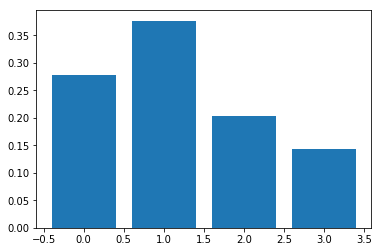

In [18]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [19]:
from catboost import CatBoostClassifier

In [20]:
cb = CatBoostClassifier(iterations=100)
cb.fit(X_train, y_train)

Learning rate set to 0.059586
0:	learn: 0.6704424	total: 51.7ms	remaining: 5.12s
1:	learn: 0.6511026	total: 53ms	remaining: 2.6s
2:	learn: 0.6316929	total: 54.1ms	remaining: 1.75s
3:	learn: 0.6137912	total: 55.3ms	remaining: 1.33s
4:	learn: 0.5975122	total: 56.4ms	remaining: 1.07s
5:	learn: 0.5817767	total: 57.5ms	remaining: 901ms
6:	learn: 0.5676769	total: 58.7ms	remaining: 779ms
7:	learn: 0.5558590	total: 59.8ms	remaining: 688ms
8:	learn: 0.5432810	total: 60.9ms	remaining: 616ms
9:	learn: 0.5312255	total: 62ms	remaining: 558ms
10:	learn: 0.5200050	total: 63.2ms	remaining: 511ms
11:	learn: 0.5083202	total: 64.3ms	remaining: 471ms
12:	learn: 0.4994971	total: 65.4ms	remaining: 438ms
13:	learn: 0.4897846	total: 65.8ms	remaining: 404ms
14:	learn: 0.4810134	total: 67ms	remaining: 380ms
15:	learn: 0.4727770	total: 68.1ms	remaining: 357ms
16:	learn: 0.4645959	total: 69.2ms	remaining: 338ms
17:	learn: 0.4578041	total: 70.4ms	remaining: 321ms
18:	learn: 0.4505527	total: 71.5ms	remaining: 305ms

In [21]:
print(cb.score(X_test, y_test))
print(log_loss(y_test, cb.predict(X_test)))
print(f1_score(y_test, cb.predict(X_test)))

0.8440366972477065
5.386803646841947
0.8776978417266187


In [22]:
importance2 = cb.feature_importances_

for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 19.99215
Feature: 1, Score: 50.55257
Feature: 2, Score: 14.91614
Feature: 3, Score: 14.53914


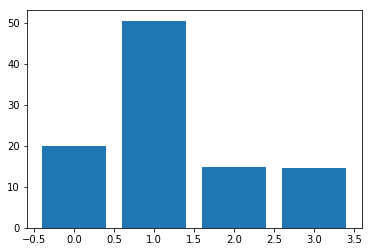

In [23]:
plt.bar([x for x in range(len(importance2))], importance2)
plt.show()

In [24]:
CB = CatBoostClassifier(iterations=100)
CB.fit(X,y)

Learning rate set to 0.065568
0:	learn: 0.6652500	total: 910us	remaining: 90.2ms
1:	learn: 0.6445716	total: 2.15ms	remaining: 106ms
2:	learn: 0.6228480	total: 3.35ms	remaining: 108ms
3:	learn: 0.6041547	total: 4.74ms	remaining: 114ms
4:	learn: 0.5870691	total: 5.91ms	remaining: 112ms
5:	learn: 0.5699241	total: 7.06ms	remaining: 111ms
6:	learn: 0.5547045	total: 8.28ms	remaining: 110ms
7:	learn: 0.5421495	total: 9.44ms	remaining: 109ms
8:	learn: 0.5290888	total: 10.6ms	remaining: 107ms
9:	learn: 0.5167390	total: 11.6ms	remaining: 104ms
10:	learn: 0.5059095	total: 12.7ms	remaining: 103ms
11:	learn: 0.4940968	total: 13.8ms	remaining: 102ms
12:	learn: 0.4851734	total: 15ms	remaining: 100ms
13:	learn: 0.4755835	total: 15.4ms	remaining: 94.8ms
14:	learn: 0.4670128	total: 16.7ms	remaining: 94.5ms
15:	learn: 0.4588615	total: 17.9ms	remaining: 93.9ms
16:	learn: 0.4517756	total: 19.1ms	remaining: 93.1ms
17:	learn: 0.4449955	total: 20.3ms	remaining: 92.6ms
18:	learn: 0.4380252	total: 21.5ms	remain

In [25]:
y_pred = CB.predict_proba(test)

In [26]:
result = pd.DataFrame(y_pred)

In [ ]:
result.to_excel("output.xlsx",index=False)